<a href="https://colab.research.google.com/github/ZoubirCHATTI/08_Machin_Learning/blob/main/01_Report_classification_Reuters/Reuters_Articles_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import reuters
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
#Loading data from Keras
(train_data, train_labels),(test_data, test_labels)=reuters.load_data(num_words=10000)


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


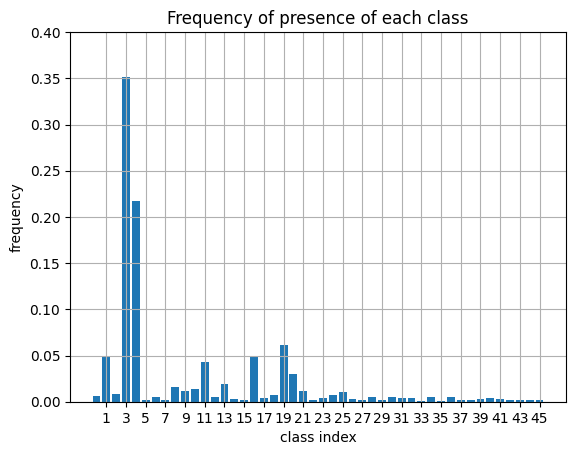

In [3]:
#Visual inspection of data
counts=np.bincount(train_labels)
plt.bar(range(len(counts)), counts/np.sum(counts))
plt.xlabel('class index')
plt.xticks(np.arange(1, 47, 2 ))
plt.ylabel('frequency')
plt.yticks(np.arange(0, 0.45, 0.05))
plt.title('Frequency of presence of each class')
plt.grid(True)
plt.show()

In [4]:
#Extracting words indices (given the word, we get the index)
word_index=reuters.get_word_index()
print(word_index['good'])
#Getting word from the index (given the index, we get the word associated)
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])


550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
545


In [5]:
#A function that decodes every index in the data to get the review
def decode_review(index, sequence):
    return " ".join([reverse_word_index.get(i-3, "?") for i in sequence[index]])

#Testing the function on review 0 and 1 of train data
review_0=decode_review(0, train_data)
review_1=decode_review(1, train_data)

print(review_0)
print(review_1)


? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa ? factors generale de banque said in a statement it gave no financial details of the transaction sa ? ? turnover in 1986 was 17 5 billion belgian francs reuter 3


In [6]:
#Transforming data (input) to a binary matrix
def vectorize_sequence(sequence, dimensions):
    results=np.zeros((len(sequence), dimensions))
    for i, seq in enumerate(sequence):
        for j in seq:
            results[i, j]=1
    return results

In [7]:
#Vectorising inputs
X_train=vectorize_sequence(train_data, 10000)
X_test=vectorize_sequence(test_data, 10000)

In [8]:
#Transforming the output to a binary matrix
def to_one_hot(sequence, dimensions):
    results = np.zeros((len(sequence), dimensions))
    for i, seq in enumerate(sequence):
        results[i, seq] = 1
    return results

In [9]:
#vectorising outputs
Y_train=to_one_hot(train_labels, 46)
Y_test=to_one_hot(test_labels, 46)

In [10]:
model=Sequential()
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [11]:
#Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#Condition of stop (if validation loss increases 4 consecutive epochs, the training stops)
early_stop=EarlyStopping(monitor='val_loss', patience=4)

In [12]:
#Running the training
history=model.fit(X_train, Y_train, validation_split=0.2, callbacks=[early_stop], epochs=20)

Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5768 - loss: 2.0071 - val_accuracy: 0.7624 - val_loss: 1.0143
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8585 - loss: 0.5900 - val_accuracy: 0.8069 - val_loss: 0.9041
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9433 - loss: 0.2703 - val_accuracy: 0.8086 - val_loss: 0.8918
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9646 - loss: 0.1604 - val_accuracy: 0.8030 - val_loss: 0.9493
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9620 - loss: 0.1499 - val_accuracy: 0.7941 - val_loss: 1.0199
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9650 - loss: 0.1183 - val_accuracy: 0.7941 - val_loss: 1.0288
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9633 - loss: 0.1151 - val_accuracy: 0.7941 - val_loss: 1.0514


In [13]:
#Evaluation on the testing dataset
loss, accuracy=model.evaluate(X_test, Y_test)
print(f"loss={loss}\naccuracy={accuracy}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7906 - loss: 1.0355
loss=1.0664128065109253
accuracy=0.7845057845115662


In [14]:
history_dict=history.history
training_loss=history_dict['loss']
training_accuracy=history_dict['accuracy']
validation_loss=history_dict['val_loss']
validation_accuracy=history_dict['val_accuracy']
epochs=range(1, len(training_loss)+1)

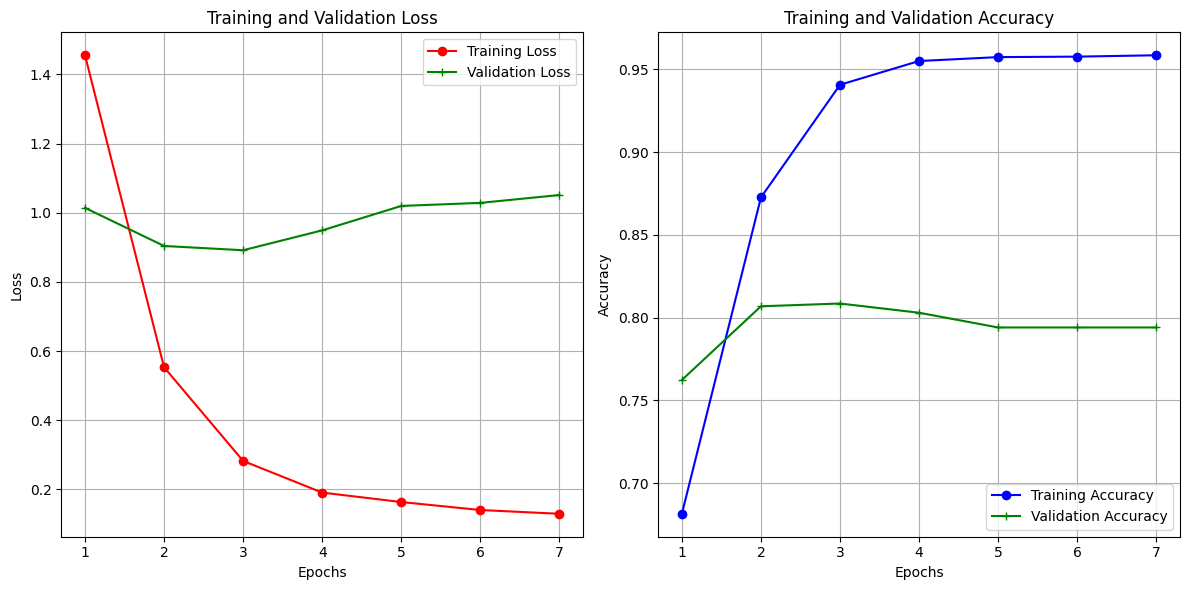

In [15]:
#Plotting loss and accuracy against epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, label='Training Loss', color='r', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', color='g', marker='+')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, label='Training Accuracy', color='b', marker='o')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', color='g', marker='+')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
#Comparing with the baseline
import copy

#Comparing model robustess with random prediciton
test_labels_copy=copy.copy(test_labels)
np.random.shuffle(test_labels_copy)

compare=np.array(test_labels_copy)==np.array(test_labels)
print(f"Random accuracy={compare.mean()}\nModel accuracy={accuracy} ")

Random accuracy=0.1856634016028495
Model accuracy=0.7845057845115662 


The baseline is 18.56%, our model precision is 78.45%, which reflect a good model accuracy